In [1]:
!python -m pip install konlpy

     |████████████████████████████████| 19.4 MB 6.2 MB/s 
     |████████████████████████████████| 86 kB 4.4 MB/s 
     |████████████████████████████████| 448 kB 68.4 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [2]:
!curl -O https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5064  100  5064    0     0  33986      0 --:--:-- --:--:-- --:--:-- 33986


In [3]:
!bash ./mecab.sh

Installing automake (A dependency for mecab-ko)
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Pac

In [4]:
!curl -O https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 19.6M  100 19.6M    0     0  11.4M      0  0:00:01  0:00:01 --:--:-- 11.4M


In [5]:
import pandas as pd

total_data = pd.read_table('./naver_shopping.txt', names=['ratings', 'reviews'])
total_data.head(10)

,ratings,reviews
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
5,2,비추합니다 계란 뒤집을 때 완전 불편해요 ㅠㅠ 코팅도 묻어나고 보기엔 예쁘고 실용적...
6,1,주문을 11월6에 시켰는데 11월16일에 배송이 왔네요 ㅎㅎㅎ 여기 회사측과는 전화...
7,2,넉넉한 길이로 주문했는데도 안 맞네요 별로예요
8,2,보폴이 계속 때처럼 나오다가 지금은 안나네요~
9,2,110인데 전문속옷브랜드 위생팬티105보다 작은듯해요. 불편해요. 밴딩부분이 다 신...


In [6]:
total_data.info()

# RangeIndex = Non-null = 200000 -> 결측치가 없다 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   ratings  200000 non-null  int64 
 1   reviews  200000 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.1+ MB


In [7]:
total_data.drop_duplicates(subset=['reviews'], inplace=True)  # inplace -> 변수를 덮어쓰기
len(total_data)

# 중복값 제거. 전체 값 200000에서 줄었음

199908

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_data = total_data['reviews']
y_data = total_data['ratings']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((149931,), (149931,), (49977,), (49977,))

In [11]:
y_data.value_counts()

5    81170
2    63948
1    36007
4    18783
Name: ratings, dtype: int64

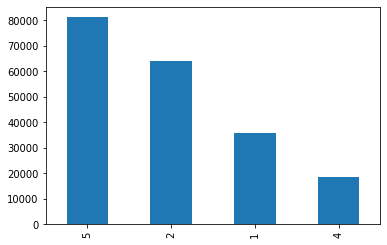

In [12]:
y_data.value_counts().plot(kind='bar')

# NLP

In [15]:
# 한글만 가져오기
x_train.str.replace('[^가-힣ㄱ-ㅎㅠ]', '')   

# 영문만 가져오기 [^a-zA-Z]

33758                                          그립감도좋고너무잘써져요
143112                               택배도착을늦게알아서무더위로상한거같아요ㅠㅠ
89048     뽁뽁이로엄청감싸져있었는데도파손되서왔네요ㅠㅠ맨뒷장이기도하고다시보내서받는데시간오래걸릴것...
165358                               한달만에고장났어요역시차이나제품은어쩔수없음
125783          출산하고하나구입합니다기다리는시간이좀걸리긴했지만역시좋아요추후에한개더구매예정입니다
                                ...                        
186129    좋지않아요창고에서오랫동안방치되어온것같은느낌이었습니다접착력은좋으나한번붙이면못떼신다고생...
96689                          배송빠르고저렴하고원래거와길이가약간차이나지만만족합니다
87828                                 홈쇼핑보고좋을꺼같아서주문했는데건조하네요
186141                    개인적으로맞지않아트러블이생겨동생줬어요동생은아무문제없는듯합니다
29531                             파자마입고자면너무푹자서보드라워서입을때마다좋아요
Name: reviews, Length: 149931, dtype: object

In [16]:
from konlpy.tag import  Mecab

In [17]:
mecab = Mecab()
print( mecab.morphs('와 이런 것도 상품이라고 차라리 내가 만드는게 나을 것 같다.') )

['와', '이런', '것', '도', '상품', '이', '라고', '차라리', '내', '가', '만드', '는', '게', '나을', '것', '같', '다', '.']


In [18]:
x_train_small = x_train[0:5000]

In [19]:
sentence= list()
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']

for tok in x_train_small:
  encoded = mecab.morphs(tok)

  # 불용어 처리
  sentence.append([ item for item in encoded if item not in stopwords ])
  # for item in encoded:
  #   if item not in stopwords:
  #     sentence.append(item)

print(sentence)

[['그립', '감', '좋', '너무', '잘', '써', '져요'], ['택배', '도착', '늦', '알', '아서', '.', '무더위', '로', '.', '상한', '거', '같', '아요', 'ㅠ', '.', 'ㅠ'], ['뽁뽁', '로', '엄청', '감싸', '져', '있', '었', '는데', '파손', '되', '서', '왔', '네요', 'ㅠㅠ', '맨', '뒷장', '기', '다시', '보내', '서', '받', '는데', '시간', '오래', '걸릴', '것', '같', '아', '그냥', '쓸', '게요'], ['달', '만', '고장났', '어요', '!', '!', '역시', '차이', '나', '제품', '어쩔', '수', '없', '음'], ['출산', '하나', '구입', '합니다', '~~', '기다리', '시간', '좀', '걸리', '긴', '했', '지만', '역시', '좋', '아요', '추후', '개', '더', '구매', '예정', '입니다', '^^'], ['뭐', '그냥', '그래요'], ['동일', '시', '즈', '로', '다른', '디자인', '두', '가지', '삿', '는데', '같이', '산', '건', '너무', '작', '이건', '큰', '건지', '정', '사이즈', '인지', '잘', '몰', '겟', '네요'], ['세상', '.', '.', '뜯', '을려는', '뎆', '안', '쯛어져요', '.', '.', '억지로', '뜯', '으려니', '전부', '엉망', '됐', '아요', '.', '..', '머', '죠', '?', 'ㅡㅡ'], ['저렴', '가격', '핏', '좋', '재질', '만족', '스럽', '네요', '.'], ['빠른', '배송', '마음', '어요'], ['배송', '아주', '빠르', '양말', '쫀쫀', '좋', '아요', '두', '번', '째', '구매', '입니다', '아주', '좋', '아요'], ['입구', '깨져서', '배송', '왔', '네

# Tokenize

In [20]:
import tensorflow as tf

In [21]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(sentence) 

In [22]:
tokenizer.word_index  # 사전 만들기

{'.': 1,
 '네요': 2,
 '좋': 3,
 '어요': 4,
 '는데': 5,
 '아요': 6,
 '잘': 7,
 '있': 8,
 '구매': 9,
 '안': 10,
 '배송': 11,
 '습니다': 12,
 '너무': 13,
 '했': 14,
 '같': 15,
 '거': 16,
 '어': 17,
 '먹': 18,
 '합니다': 19,
 '재': 20,
 '되': 21,
 '요': 22,
 '!': 23,
 '기': 24,
 '없': 25,
 '~': 26,
 '쓰': 27,
 '않': 28,
 '것': 29,
 '사용': 30,
 '로': 31,
 '나': 32,
 '..': 33,
 '해서': 34,
 '었': 35,
 '아': 36,
 '았': 37,
 '으로': 38,
 '만': 39,
 '보다': 40,
 '겠': 41,
 '아서': 42,
 '서': 43,
 '지만': 44,
 '보': 45,
 '해': 46,
 '어서': 47,
 ',': 48,
 '주': 49,
 '그냥': 50,
 '만족': 51,
 '해요': 52,
 '면': 53,
 '주문': 54,
 '제품': 55,
 '가격': 56,
 '생각': 57,
 '좀': 58,
 '맛': 59,
 '할': 60,
 '니': 61,
 '입니다': 62,
 '라': 63,
 '더': 64,
 '받': 65,
 '많이': 66,
 '맛있': 67,
 '사': 68,
 '사이즈': 69,
 '번': 70,
 '샀': 71,
 '개': 72,
 '시': 73,
 '에서': 74,
 '때': 75,
 '작': 76,
 '음': 77,
 '?': 78,
 '별로': 79,
 '왔': 80,
 '다른': 81,
 '빠르': 82,
 '수': 83,
 '입': 84,
 'ㅠㅠ': 85,
 '두': 86,
 '맞': 87,
 '세요': 88,
 '저렴': 89,
 '^^': 90,
 '던': 91,
 '감사': 92,
 '괜찮': 93,
 '아니': 94,
 'ㅠ': 95,
 '넘': 96,
 '에요':

In [23]:
tokenizer.word_counts  # 전체 문장에서 단어가 몇번 반복됐는지 

OrderedDict([('그립', 7),
             ('감', 72),
             ('좋', 1679),
             ('너무', 676),
             ('잘', 888),
             ('써', 78),
             ('져요', 23),
             ('택배', 51),
             ('도착', 32),
             ('늦', 59),
             ('알', 101),
             ('아서', 317),
             ('.', 3831),
             ('무더위', 1),
             ('로', 379),
             ('상한', 9),
             ('거', 554),
             ('같', 602),
             ('아요', 1008),
             ('ㅠ', 149),
             ('뽁뽁', 5),
             ('엄청', 108),
             ('감싸', 1),
             ('져', 14),
             ('있', 866),
             ('었', 352),
             ('는데', 1067),
             ('파손', 14),
             ('되', 449),
             ('서', 316),
             ('왔', 184),
             ('네요', 1725),
             ('ㅠㅠ', 172),
             ('맨', 3),
             ('뒷장', 1),
             ('기', 415),
             ('다시', 90),
             ('보내', 127),
             ('받', 236),
             ('시간', 52)

In [24]:
total_cnt = len(tokenizer.word_index)  
rare_cnt = 0 #  2 미만으로 사용된 단어
total_freq, rare_freq = 0, 0

for key, value in tokenizer.word_counts.items():  # word_counts가 딕셔너리로 되있어서 뽑을 수 있음
  total_freq = total_freq + value
  if value <= 2:
      rare_cnt =  rare_cnt + 1
      rare_freq = rare_freq + value  


In [25]:
total_cnt, rare_cnt, (rare_cnt/total_cnt)*100, (rare_freq/total_freq)*100

# 전체 단어 수, 희귀 단어 수, 희귀 단어의 비중, 희귀 단어가 전체 단어 중에서 등장하는 빈도 비중

(8053, 5245, 65.13100707810754, 7.704189539221977)

In [26]:
vocab_size = total_cnt - rare_cnt  # 사전 단어 수

In [27]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(vocab_size, oov_token='OOV')
tokenizer.fit_on_texts(sentence)

In [28]:
x_train_small = tokenizer.texts_to_sequences(sentence)
print(x_train_small[0:3])

[[1211, 184, 4, 14, 8, 177, 491], [253, 373, 223, 137, 43, 2, 1, 32, 2, 996, 17, 16, 7, 96, 2, 96], [1556, 32, 127, 1, 723, 9, 36, 6, 724, 22, 44, 81, 3, 86, 2185, 1, 25, 152, 109, 44, 66, 6, 249, 224, 2186, 30, 16, 37, 51, 171, 682]]


In [29]:
len(x_train_small[0]), len(x_train_small[15]), len(x_train_small[40])

(7, 6, 25)

In [30]:
hist_len = [ len(words) for words in x_train_small ]

(array([ 19.,  61., 445., 375., 359., 600., 236., 378., 171., 156., 276.,
        129., 223.,  91.,  81., 164.,  81., 168.,  66.,  71., 123.,  48.,
        111.,  41.,  36.,  87.,  41.,  63.,  30.,  22.,  43.,  20.,  43.,
         12.,  20.,  35.,   8.,  17.,  11.,   3.,   7.,   8.,   9.,   2.,
          5.,   1.,   1.,   2.,   0.,   1.]),
 array([ 1. ,  2.4,  3.8,  5.2,  6.6,  8. ,  9.4, 10.8, 12.2, 13.6, 15. ,
        16.4, 17.8, 19.2, 20.6, 22. , 23.4, 24.8, 26.2, 27.6, 29. , 30.4,
        31.8, 33.2, 34.6, 36. , 37.4, 38.8, 40.2, 41.6, 43. , 44.4, 45.8,
        47.2, 48.6, 50. , 51.4, 52.8, 54.2, 55.6, 57. , 58.4, 59.8, 61.2,
        62.6, 64. , 65.4, 66.8, 68.2, 69.6, 71. ]),
 <a list of 50 Patch objects>)

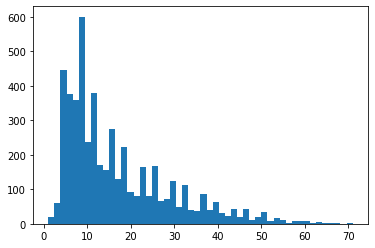

In [31]:
import matplotlib.pyplot as plt

plt.hist(hist_len, bins=50)

In [32]:
sum(hist_len) / len(x_train_small)

16.8324

In [33]:
x_train_small = tf.keras.preprocessing.sequence.pad_sequences(x_train_small, maxlen=50)

In [34]:
y_train_small = y_train[0:5000]

In [38]:
import numpy as np

y_train_small = np.array(y_train_small)-1 # 0부터 시작하게 바꿈
np.unique(y_train_small)  # 0~4 -> Dense=5

array([0, 1, 3, 4])

# Make model

In [39]:
model = tf.keras.Sequential()

# Input Layer 
model.add(tf.keras.layers.Embedding(input_dim= vocab_size, output_dim=30, input_length=50))

# Hidden Layer
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128) ))  # Bidirectional으로 랩핑을 하면 성능이 올라감

# Output Layer
model.add(tf.keras.layers.Dense(5, activation='softmax'))

# Gadget
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [40]:
model.fit(x_train_small, y_train_small, epochs=3, batch_size=256, validation_split=0.3)

Epoch 1/3
14/14 [==============================] - 12s 580ms/step - loss: 1.4447 - accuracy: 0.4017 - val_loss: 1.3205 - val_accuracy: 0.4087
Epoch 2/3
14/14 [==============================] - 7s 505ms/step - loss: 1.2753 - accuracy: 0.4406 - val_loss: 1.2600 - val_accuracy: 0.4060
Epoch 3/3
14/14 [==============================] - 7s 507ms/step - loss: 1.2204 - accuracy: 0.4669 - val_loss: 1.1896 - val_accuracy: 0.4933
